# ENEM 2016 Classification

## Importings

In [117]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)

import matplotlib as plt
import seaborn as sns

# sns.set()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape

((13730, 167), (4570, 43))

## Visualization

In [18]:
train.head(3)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [19]:
test.head(3)

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D


Droping columns

In [11]:
test_inscricao = test.pop("NU_INSCRICAO")

In [15]:
test.drop(["CO_UF_RESIDENCIA"], axis=1, inplace=True)

In [17]:
test.head(3)

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D


Defining the target and counting the distribution

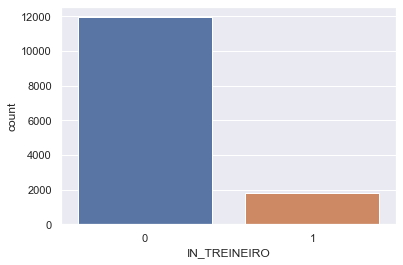

In [119]:
target = train["IN_TREINEIRO"]
sns.countplot(target);

In [68]:
test.isna().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
TP_DEPENDENCIA_ADM_ESC    0
IN_BAIXA_VISAO            0
IN_CEGUEIRA               0
IN_SURDEZ                 0
IN_DISLEXIA               0
IN_DISCALCULIA            0
IN_SABATISTA              0
IN_GESTANTE               0
IN_IDOSO                  0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
Q001                      0
Q002                      0
Q006                

In [64]:
print(train["TP_ENSINO"].median(), train["TP_DEPENDENCIA_ADM_ESC"].median(), train["Q027"].mode()[0])
print(test["TP_ENSINO"].median(), test["TP_DEPENDENCIA_ADM_ESC"].median(), test["Q027"].mode()[0])

1.0 2.0 F
1.0 2.0 F


In [67]:
train["TP_ENSINO"].fillna(1, inplace=True)
train["TP_DEPENDENCIA_ADM_ESC"].fillna(2, inplace=True)
train["Q027"].fillna("F", inplace=True)
train.fillna(0, inplace=True)
test["TP_ENSINO"].fillna(1, inplace=True)
test["TP_DEPENDENCIA_ADM_ESC"].fillna(2, inplace=True)
test["Q027"].fillna("F", inplace=True)
test.fillna(0, inplace=True)

In [70]:
train = train[test.columns]
train.shape, test.shape

((13730, 41), (4570, 41))

In [84]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.shape, test.shape

((13730, 121), (4570, 121))

## Training

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(train, target, train_size=.7, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((9611, 121), (4119, 121), (9611,), (4119,))

In [134]:
mdl = DecisionTreeClassifier(max_depth=3,random_state=42)
mdl.fit(xtrain, ytrain)
p = mdl.predict(xtest)

In [135]:
print(classification_report(ytest, p, digits=4))

              precision    recall  f1-score   support

           0     0.9964    1.0000    0.9982      3577
           1     1.0000    0.9760    0.9879       542

    accuracy                         0.9968      4119
   macro avg     0.9982    0.9880    0.9930      4119
weighted avg     0.9969    0.9968    0.9968      4119



In [143]:
from sklearn.metrics import confusion_matrix, f1_score

confusion_matrix(ytest, p)

array([[3577,    0],
       [  13,  529]], dtype=int64)

In [139]:
f1_score(ytest, p)

0.9878618113912232

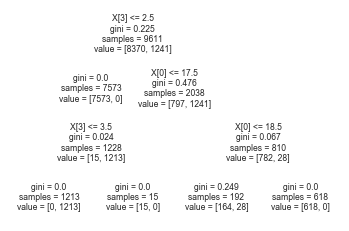

In [120]:
tree.plot_tree(mdl);

In [101]:
test_result = mdl.predict(test)
test_result

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [106]:
answer = pd.DataFrame(test_result, index=test_inscricao)
answer.columns = ["IN_TREINEIRO"]
answer.to_csv("answer.csv")